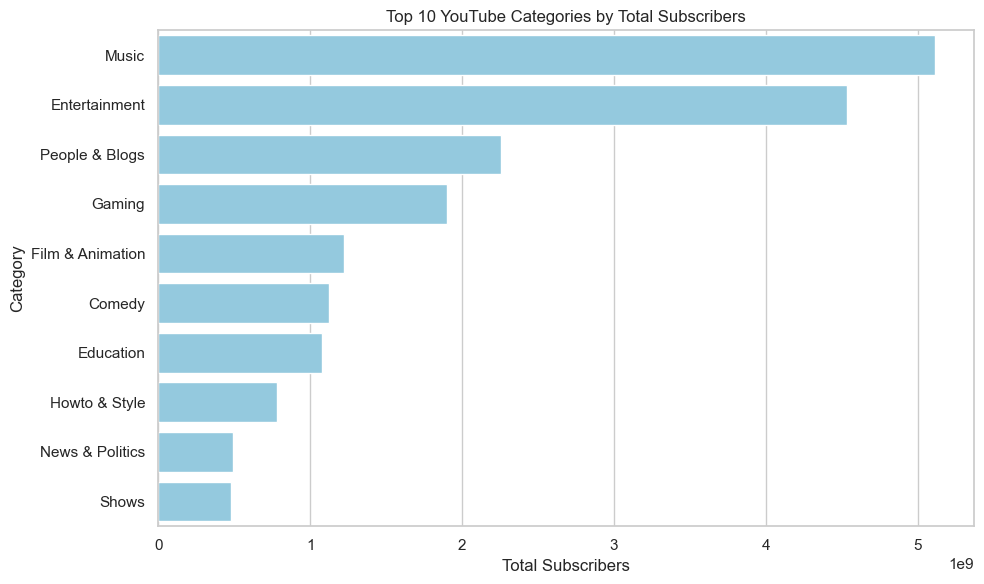

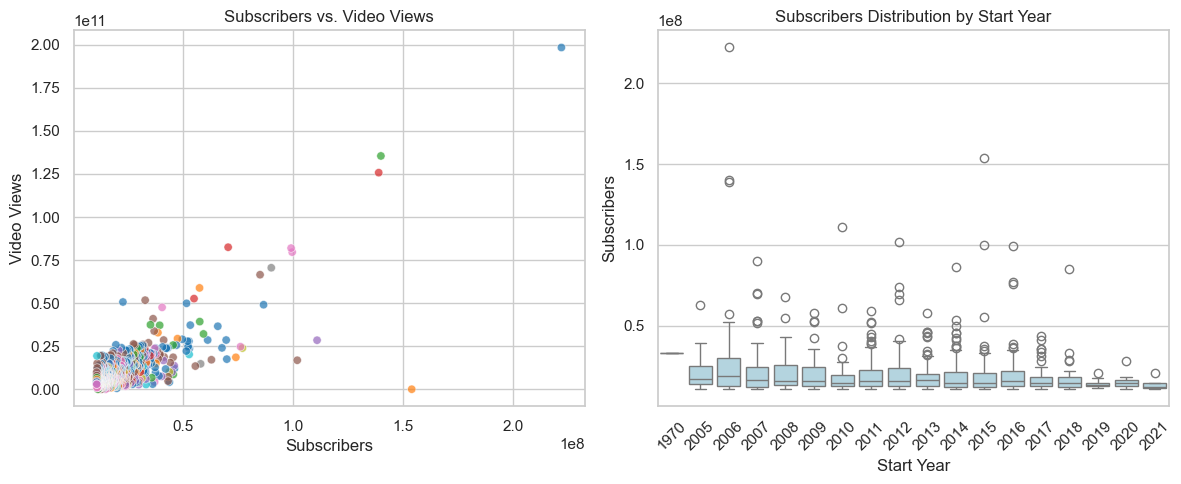

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("F:\\INTERNSHIP\\most_subscribed_youtube_channels.csv")

# Data Cleaning
df['subscribers'] = df['subscribers'].str.replace(',', '').astype(float)
df['video views'] = df['video views'].str.replace(',', '').astype(float)
df['video count'] = df['video count'].str.replace(',', '').astype(float)

# Drop missing or irrelevant entries
df = df.dropna(subset=['category'])
df = df[df['subscribers'] > 0]

# Set Seaborn theme
sns.set(style="whitegrid")

# -----------------------------
# 1. Top 10 Categories by Subscribers
# -----------------------------
top_categories = df.groupby('category')['subscribers'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, color='skyblue')
plt.title('Top 10 YouTube Categories by Total Subscribers')
plt.xlabel('Total Subscribers')
plt.ylabel('Category')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Subscribers vs Video Views
# -----------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x='subscribers',
    y='video views',
    hue='category',
    palette='tab10',
    alpha=0.7,
    legend=False
)
plt.title('Subscribers vs. Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')

# -----------------------------
# 3. Subscribers by Start Year
# -----------------------------
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='started', y='subscribers', color='lightblue')
plt.xticks(rotation=45)
plt.title('Subscribers Distribution by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Subscribers')

plt.tight_layout()
plt.show()
